In [78]:
import datetime
import demandlib.bdew as bdew
import demandlib.particular_profiles as profiles
from datetime import time as settime
from matplotlib import pyplot as plt
%matplotlib inline

In [43]:
#These days are copied from 2010 and aren't correct for 2017. Nobody really cares.

holidays = { 
    datetime.date(2017, 5, 24): 'Whit Monday',
    datetime.date(2017, 4, 5): 'Easter Monday',
    datetime.date(2017, 5, 13): 'Ascension Thursday',
    datetime.date(2017, 1, 1): 'New year',
    datetime.date(2017, 10, 3): 'Day of German Unity',
    datetime.date(2017, 12, 25): 'Christmas Day',
    datetime.date(2017, 5, 1): 'Labour Day',
    datetime.date(2017, 4, 2): 'Good Friday',
    datetime.date(2017, 12, 26): 'Second Christmas Day'}

In [44]:
year = 2017

In [81]:
ann_el_demand_per_sector = {
'Residential': 9000,
'Services': 3000,
'Industry baseload': 6000,
'Industry working hours': 5000,
'Charging electric cars' : 4000,
'Transport people': 3000,
'Transport goods': 2000,
'g0': 3000,
'h0': 3000,
'i0': 3000,
'i1': 5000,
'i2': 6000,
'g6': 5000
}


In [ ]:
elec_demand['Residential'] = ilp.simple_profile(ann_el_demand_per_sector['Residential'],profile_factors={'week': {'day': 1.0, 'night': 0.8},'weekend': {'day': 0.8, 'night': 0.6}})

In [82]:
# read standard load profiles
e_slp = bdew.ElecSlp(year, holidays=holidays)

In [83]:

# multiply given annual demand with timeseries
elec_demand = e_slp.get_profile(new_ann_el_demand_per_sector)

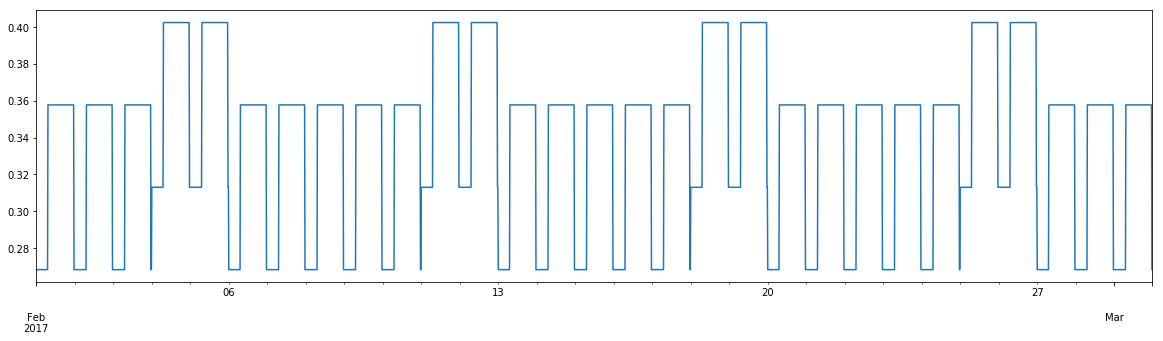

In [93]:
elec_demand['i0'].loc['2017-02-01' : '2017-03-01'].plot(figsize = (20,5))

In [63]:
# Add the slp for the industrial group
ilp = profiles.IndustrialLoadProfile(e_slp.date_time_index, holidays=holidays)

In [94]:
ilp.simple_profile??

In [92]:
# Beginning and end of workday, weekdays and weekend days, and scaling factors
# by default
elec_demand['i0'] = ilp.simple_profile(ann_el_demand_per_sector['i0'])

In [68]:
elec_demand[:5]

,g0,g6,h0,i0
2017-01-01 00:00:00,0.188198,0.502639,0.262623,0.313029
2017-01-01 00:15:00,0.181766,0.457401,0.243641,0.313029
2017-01-01 00:30:00,0.175453,0.417190,0.225260,0.313029
2017-01-01 00:45:00,0.169736,0.387032,0.207479,0.313029
2017-01-01 01:00:00,0.164614,0.366926,0.190540,0.313029


In [69]:
# Set beginning of workday to 9 am
elec_demand['i1'] = ilp.simple_profile(ann_el_demand_per_sector['i1'],am=settime(9, 0, 0))

In [70]:
# Change scaling factors
elec_demand['i2'] = ilp.simple_profile(ann_el_demand_per_sector['i2'],profile_factors={'week': {'day': 1.0, 'night': 0.8},'weekend': {'day': 0.8, 'night': 0.6}})

In [71]:
print("Be aware that the values in the DataFrame are 15minute values with a")
print("power unit. If you sum up a table with 15min values the result will")
print("be of the unit 'kW15minutes'.")
print(elec_demand.sum())

print("You will have to divide the result by 4 to get kWh.")
print(elec_demand.sum() / 4)

print("Or resample the DataFrame to hourly values using the mean() method.")




Be aware that the values in the DataFrame are 15minute values with a
power unit. If you sum up a table with 15min values the result will
be of the unit 'kW15minutes'.
g0    12000.0
g6    20000.0
h0    12000.0
i0    12000.0
i1    20000.0
i2    24000.0
dtype: float64
You will have to divide the result by 4 to get kWh.
g0    3000.0
g6    5000.0
h0    3000.0
i0    3000.0
i1    5000.0
i2    6000.0
dtype: float64
Or resample the DataFrame to hourly values using the mean() method.


g0    3000.0
g6    5000.0
h0    3000.0
i0    3000.0
i1    5000.0
i2    6000.0
dtype: float64


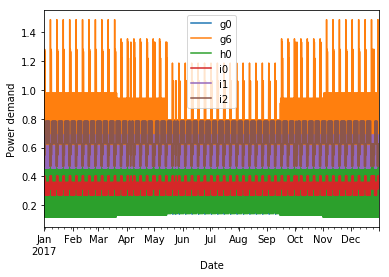

In [72]:

# Resample 15-minute values to hourly values.
elec_demand = elec_demand.resample('H').mean()
print(elec_demand.sum())

# Plot demand
ax = elec_demand.plot()
ax.set_xlabel("Date")
ax.set_ylabel("Power demand")
plt.show()


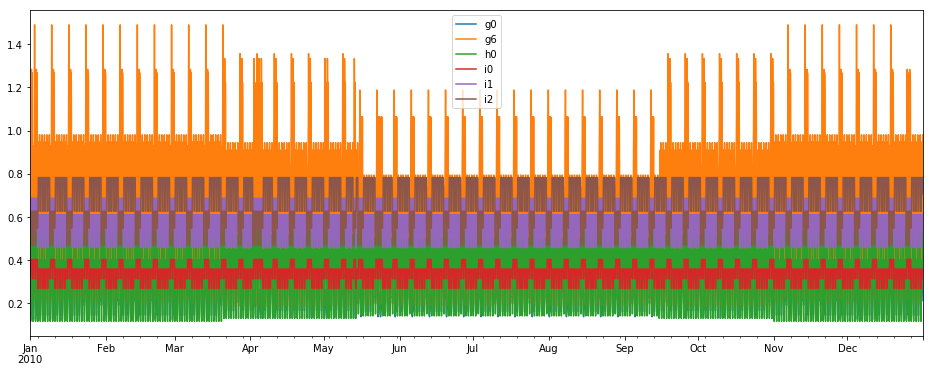

In [42]:
elec_demand.plot(figsize = (16,6))
plt.show()

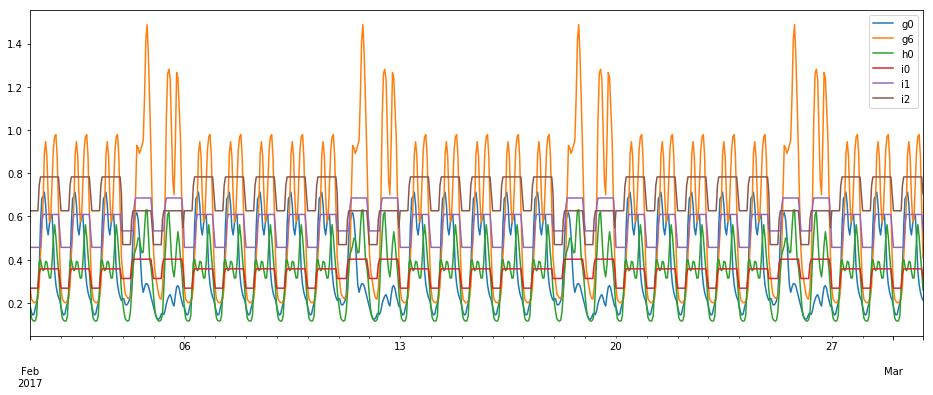

In [79]:
elec_demand.loc['2017-02-01' : '2017-03-01'].plot(figsize = (16,6))

# todo add this to GIST (part of github)